Clean Data
Identify outliers with PCA
Drop Outliers
Run Correlation on numeric features
Use 11 top correlated features in MLR model using statsmodel

In [1]:
import numpy as np
import pandas as pd
import datacleaning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

HousePrices = pd.read_csv('data/train.csv')
cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')

y = np.log(HousePrices['SalePrice'])
X = cleaned_hp.drop('Id',axis = 1)

np.random.seed(1)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2) 

C:\Users\Zefa\Desktop\NYCDSA\Kaggle_House_Prices\datacleaning.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Living_Rec_Cont["BsmtHalfBath"]*0.75 + Living_Rec_Cont["HalfBath"]
C:\Users\Zefa\Desktop\NYCDSA\Kaggle_House_Prices\datacleaning.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = dataframe[col].apply(lambda x: int(qual_[x]))
C:\Users\Zefa\Desktop\NYCDSA\Kaggle_House_Prices\datacleaning.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

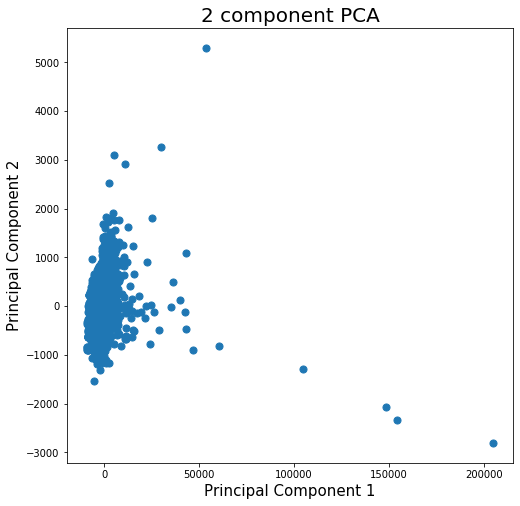

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['principal component 1']],
           principalDf[['principal component 2']],
            s = 50)

In [3]:
p1_list = list(principalDf['principal component 1'].nlargest(5).index)
p2_list = list(principalDf['principal component 2'].nlargest(5).index)

cleaned_hp.iloc[p1_list]

,Id,CentralAir,HeatingQC,garage_score,Heating,Electrical,GarageArea,TotalBsmtSF,finishedbsmt,2Types,...,Ext_Stucco,Ext_WdSdng,Ext_WdShing,House_1.5Fin,House_1.5Unf,House_2.5Fin,House_2.5Unf,House_2Story,House_SFoyer,House_SLvl
313,314,1,3,6,1,5,513,2136,0.962547,0,...,0,0,0,0,0,0,0,0,0,0
335,336,1,5,6,1,5,529,1499,0.931288,0,...,0,0,0,1,0,0,0,0,0,0
249,250,1,4,6,1,5,389,1444,0.482687,0,...,0,1,0,1,0,0,0,0,0,0
706,707,1,3,6,1,5,739,1643,0.741935,0,...,0,0,0,0,0,0,0,0,0,0
451,452,1,3,6,1,5,576,1533,0.427267,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 432x288 with 0 Axes>

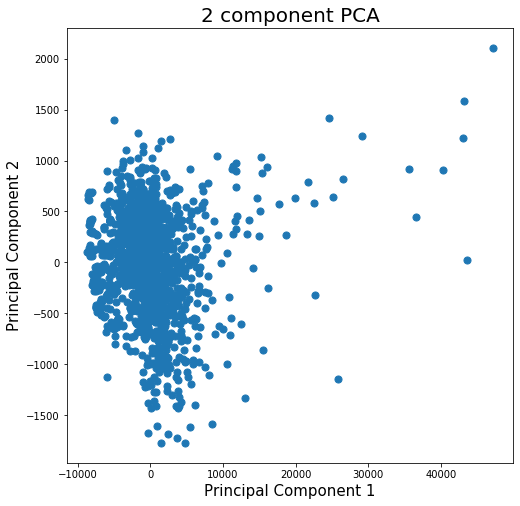

In [4]:
pca_drop_df = cleaned_hp.iloc[~cleaned_hp.index.isin(p1_list)]
pca_drop_df = pca_drop_df.iloc[~pca_drop_df.index.isin(p2_list)]
y_drop = y.iloc[~y.index.isin(p1_list)]
y_drop = y_drop.iloc[~y_drop.index.isin(p2_list)]

pca_drop = PCA(n_components=2)
principalComponents = pca_drop.fit_transform(pca_drop_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# finalDf = pd.concat([principalDf, y_drop], axis = 1)

plt.clf()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['principal component 1']],
           principalDf[['principal component 2']],
            s = 50)

In [7]:
pca_drop_df['TotalSF']= pca_drop_df.TotalBsmtSF +pca_drop_df.GrLivArea
pca_drop_df

,principal component 1,principal component 2,SalePrice
0,-2066.082857,92.227672,12.247694
1,-917.466889,-64.683919,12.109011
2,735.395098,146.748492,12.317167
3,-967.073346,39.032209,11.849398
4,3754.774254,618.852958,12.429216
...,...,...,...
1455,-2599.154858,82.532026,12.072541
1456,2671.708966,688.565711,12.254863
1457,-1463.177275,686.091994,12.493130
1458,-805.819646,-354.249679,11.864462


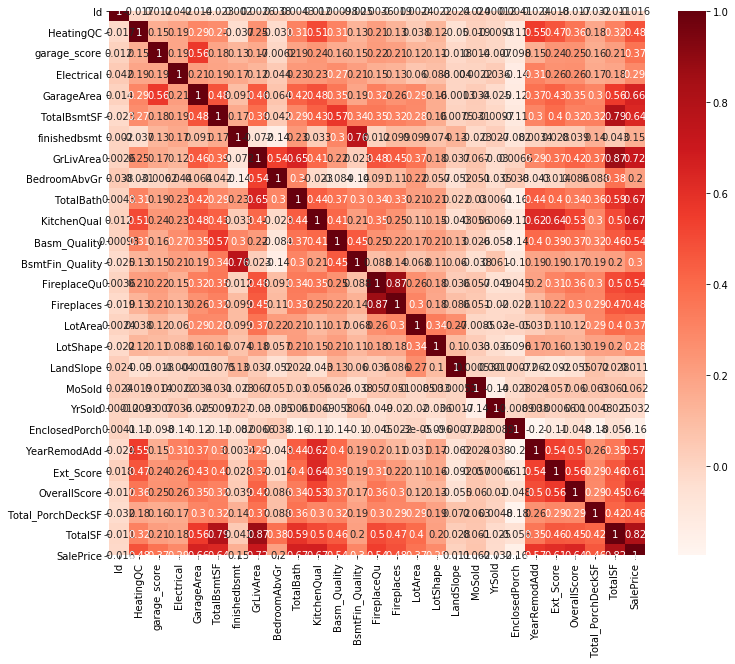

In [12]:
import seaborn as sns
fullDf = pd.concat([pca_drop_df, y_drop], axis = 1)
x = fullDf.apply(pd.Series.nunique)
corr_df = fullDf[x[x>2].index]

plt.figure(figsize=(12,10))
cor = corr_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
# 11 features have higher than 0.5 correlation with Price
# Check if this changes with normalization? shouldn't
corr_features = list(cor.SalePrice.nlargest(12).index)[1:]

SalePrice       1.000000
TotalSF         0.816727
GrLivArea       0.717300
KitchenQual     0.669891
TotalBath       0.666275
GarageArea      0.656986
OverallScore    0.642955
TotalBsmtSF     0.637507
Ext_Score       0.608431
YearRemodAdd    0.572880
FireplaceQu     0.544448
Basm_Quality    0.541744
Name: SalePrice, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features_1 = pca_drop_df[corr_features]

scaler = StandardScaler()
scaler.fit(features_1)
Xdrop_train_scaled = scaler.transform(features_1)
# X_test_scaled  = scaler.transform(X_test)

Xdrop_add_const = sm.add_constant(Xdrop_train_scaled)
ols = sm.OLS(y_drop, Xdrop_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     943.0
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:35:43   Log-Likelihood:                 757.06
No. Observations:                1450   AIC:                            -1492.
Df Residuals:                    1439   BIC:                            -1434.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0194      0.004   3176.130      0.0

<Figure size 432x288 with 0 Axes>

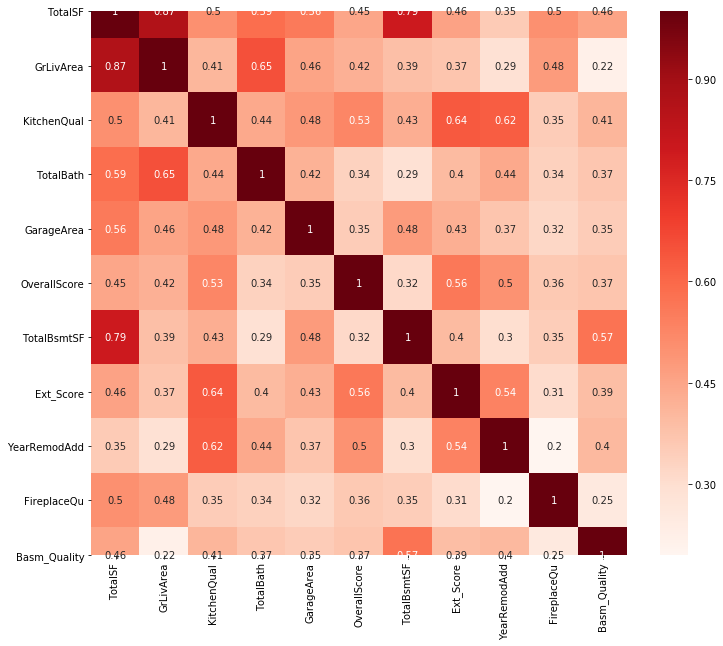

In [22]:
# Need to drop GrLivArea and TotalBsmentSF because of multicollinearity
plt.clf()
plt.figure(figsize=(12,10))
cor2 = features_1.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)
plt.show()

## Recomendation

- Drop GrLivArea and TotalBsmtSF in favor of TotalSF
- Run ElasticNetCV to evaluate how these 9 features perform on test vs train